# Dataset analysis

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from rdkit.Chem import SDMolSupplier

In [ ]:
supp_train = list(SDMolSupplier("../raw_data/NMR_FF_train.sdf", True, False, True))
supp_test = list(SDMolSupplier("../raw_data/NMR_FF_test.sdf", True, False, True))

In [ ]:
num_atoms = np.zeros(len(supp_train))
num_heavy = np.zeros_like(num_atoms)
num_labeled = np.zeros_like(num_atoms)
num_carbon = np.zeros_like(num_atoms)
for id, mol in enumerate(supp_train):
    num_atoms[id] = len(mol.GetAtoms())
    num_labeled[id] = mol.GetProp("C13 Chemical Shift").count("|")
    for atom in mol.GetAtoms():
        if atom.GetSymbol() != 'H':
            num_heavy[id] += 1
        if atom.GetSymbol() == 'C':
            num_carbon[id] += 1


In [ ]:
print(num_atoms.max(), num_atoms.min(), np.average(num_atoms))
print(num_carbon.max(), num_carbon.min(), np.average(num_carbon))
print(num_heavy.max(), num_heavy.min(), np.average(num_heavy))
print(num_labeled.max(), num_labeled.min(), np.average(num_labeled))
print(len(supp_train))


64.0 3.0 26.962527314147565
34.0 1.0 10.685062067041704
44.0 1.0 14.201032126086755
34.0 1.0 9.930029290064624
21509


In [ ]:
num_atoms = np.zeros(len(supp_test))
num_heavy = np.zeros_like(num_atoms)
num_labeled = np.zeros_like(num_atoms)
num_carbon = np.zeros_like(num_atoms)
for id, mol in enumerate(supp_test):
    num_atoms[id] = len(mol.GetAtoms())
    num_labeled[id] = mol.GetProp("C13 Chemical Shift").count("|")
    for atom in mol.GetAtoms():
        if atom.GetSymbol() != 'H':
            num_heavy[id] += 1
        if atom.GetSymbol() == 'C':
            num_carbon[id] += 1


In [ ]:
print(num_atoms.max(), num_atoms.min(), np.average(num_atoms))
print(num_carbon.max(), num_carbon.min(), np.average(num_carbon))
print(num_heavy.max(), num_heavy.min(), np.average(num_heavy))
print(num_labeled.max(), num_labeled.min(), np.average(num_labeled))
print(len(supp_test))

64.0 5.0 26.74043817304122
33.0 1.0 10.623282584478277
38.0 2.0 14.137950241366505
32.0 1.0 9.884886743408838
5386


In [ ]:
train = pd.read_parquet("../data/atomic_datasets/NMR_FF_train_mace_l_C.parquet")
test = pd.read_parquet("../data/atomic_datasets/NMR_FF_test_mace_l_C.parquet")

In [ ]:
train["Dataset"] = "train"
test["Dataset"] = "test"
data = pd.concat([train,test])

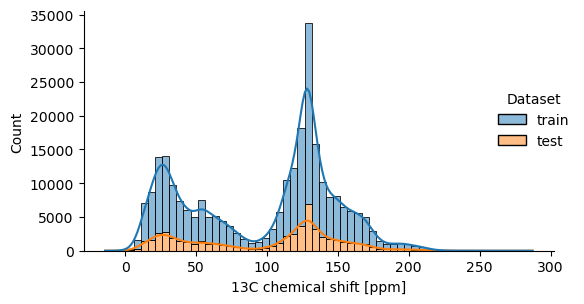

In [ ]:
cm = 1/2.54
g = sns.displot(data, x="shift", kde=True,hue="Dataset", multiple="stack", binwidth=5,height=8*cm, aspect=15/8);
g.set(xlabel='13C chemical shift [ppm]')
sns.move_legend(g, "center", bbox_to_anchor=(.8, .6))
g.tight_layout()
#g.savefig("data_distribution.pdf",dpi=800)
#g.savefig("data_distribution.tiff",dpi=800)